In [96]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [97]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [98]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


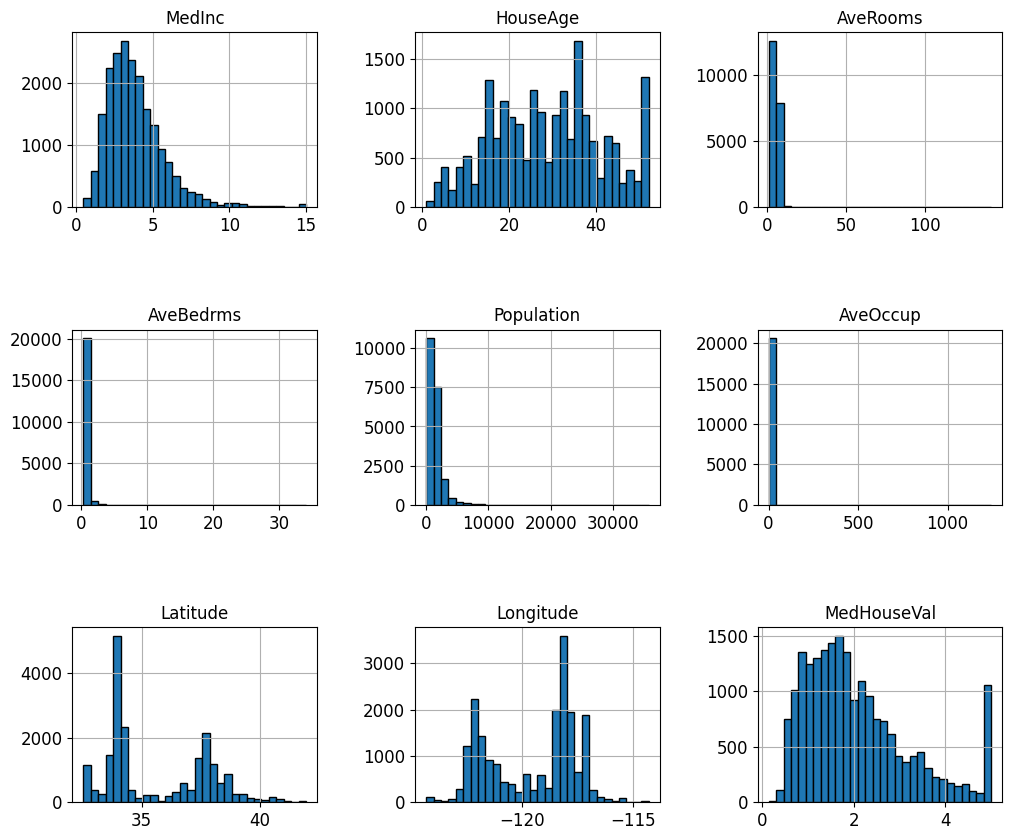

In [99]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [100]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


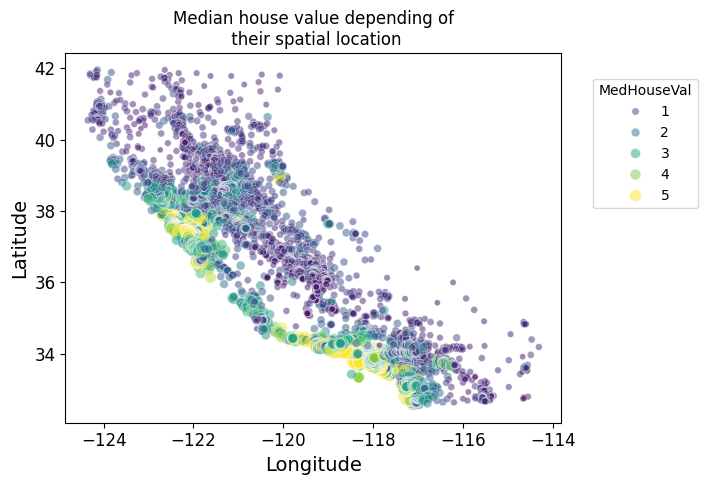

In [101]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

In [102]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [103]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [104]:
fetch_housing_data()

In [105]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [106]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [107]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [108]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


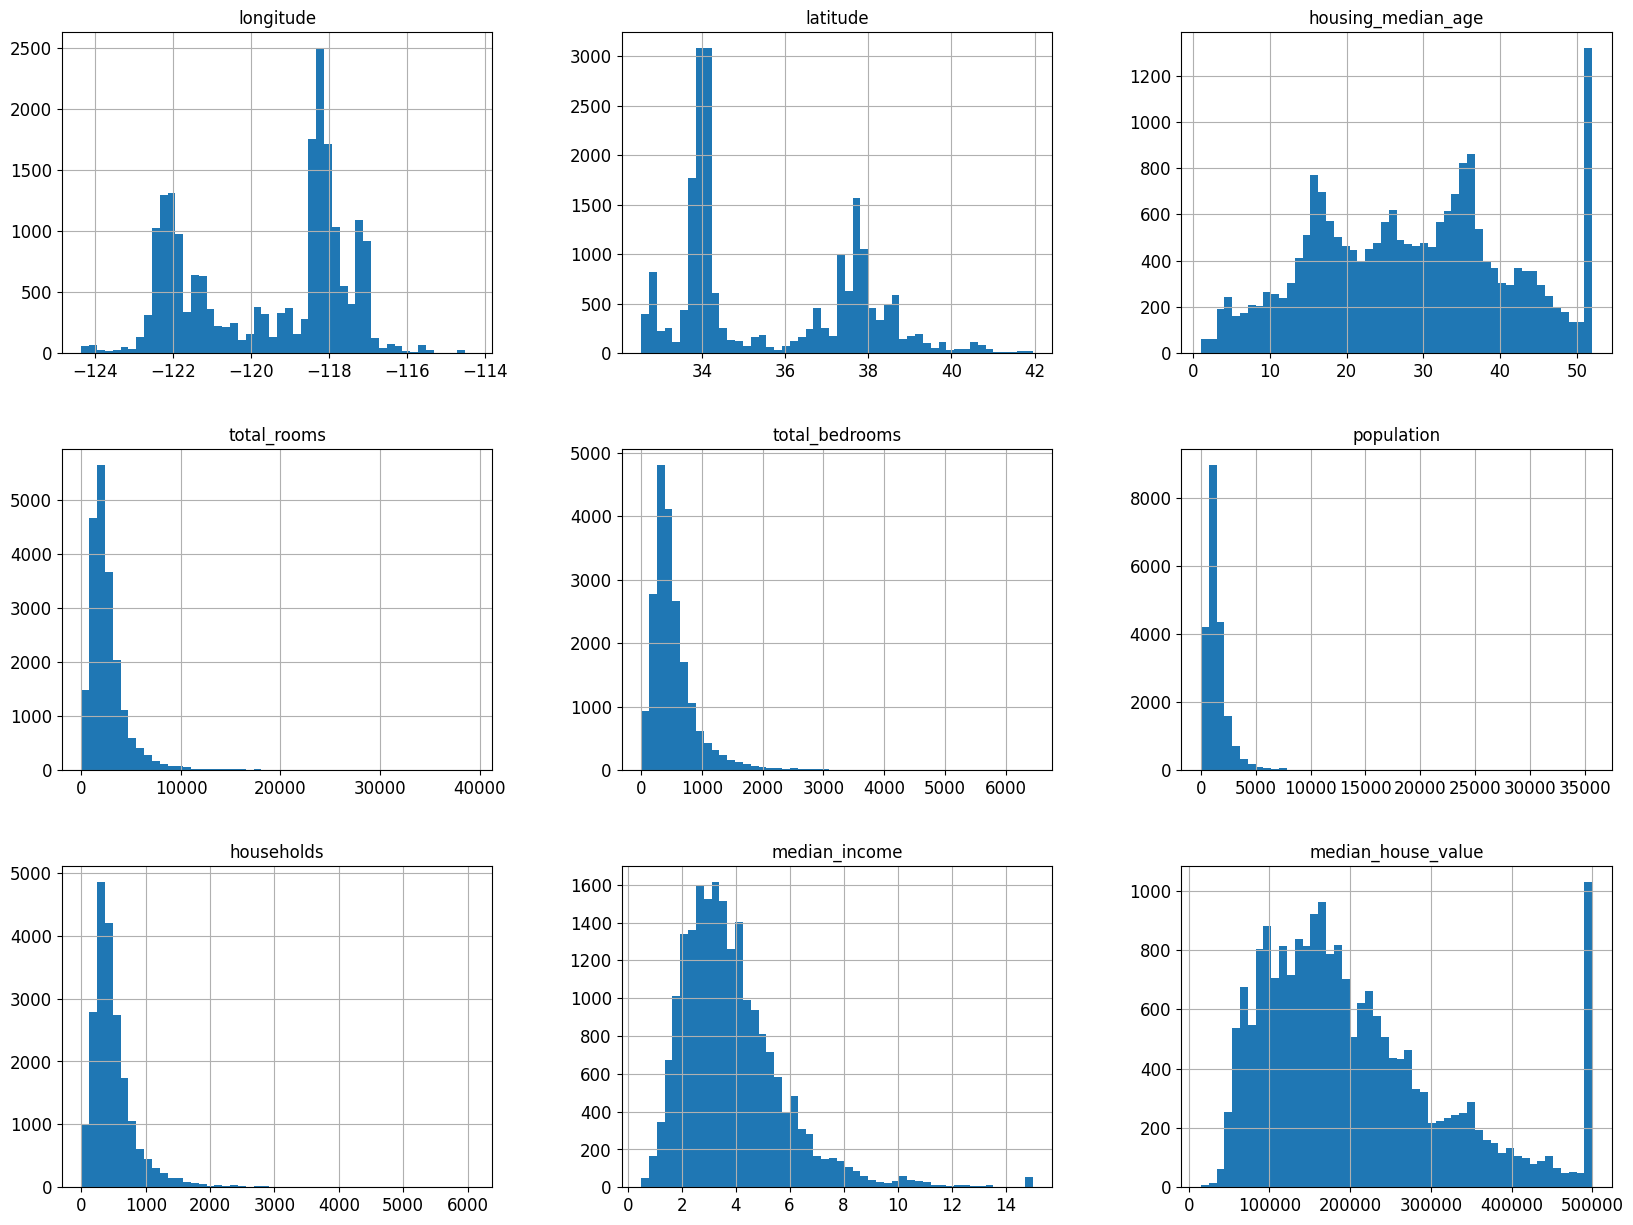

In [109]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [110]:
np.random.seed(42)

In [111]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [112]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


In [113]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [114]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [115]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [116]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [117]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [118]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


<Axes: >

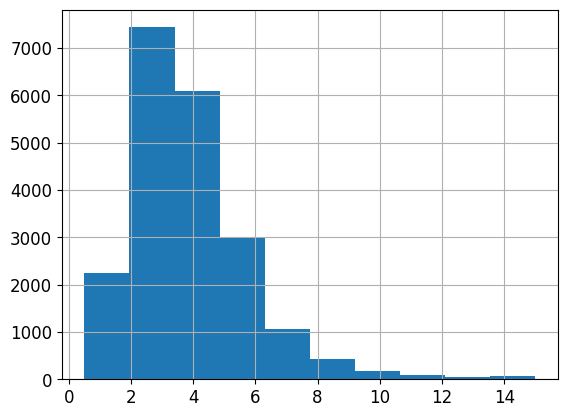

In [119]:
housing["median_income"].hist()

In [120]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [121]:
housing["income_cat"].value_counts()

,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


<Axes: >

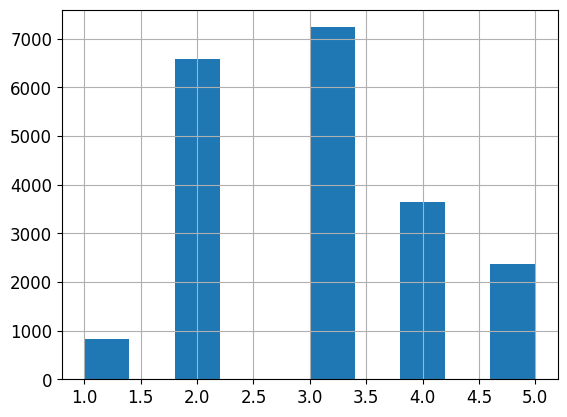

In [122]:
housing["income_cat"].hist()

In [123]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [124]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [125]:
housing["income_cat"].value_counts() / len(housing)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [126]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split # Import the function from the correct module

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [127]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [128]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [129]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [130]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

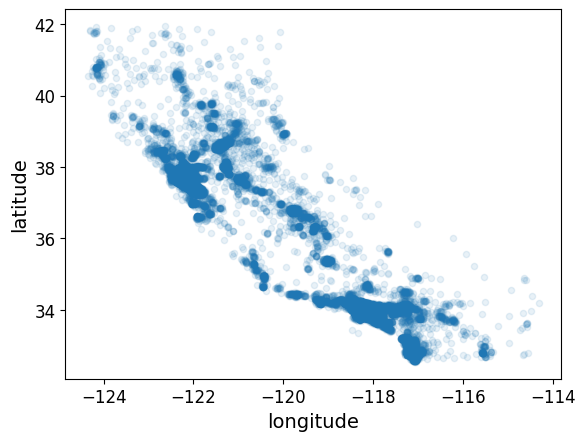

In [131]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

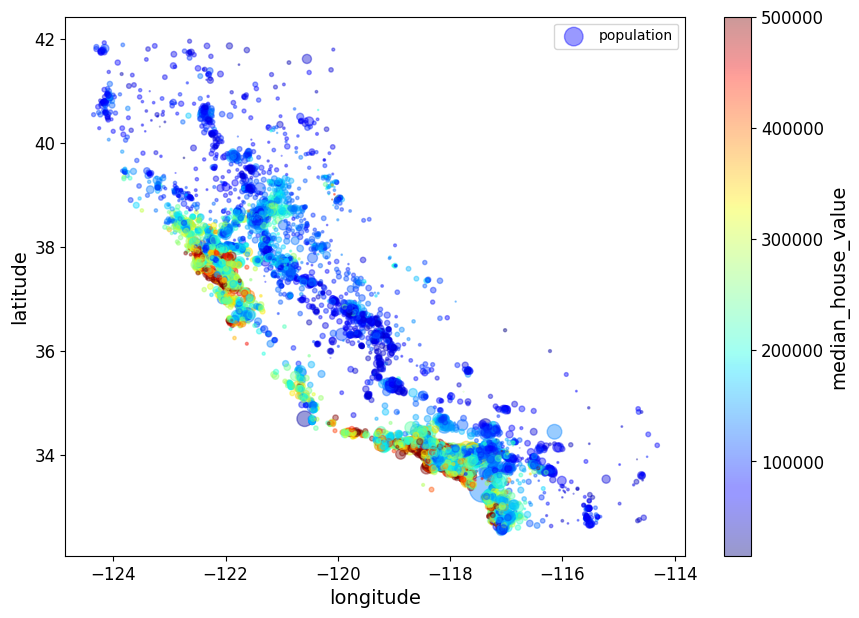

In [132]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [133]:
corr_matrix = housing.corr(numeric_only=True)

In [134]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

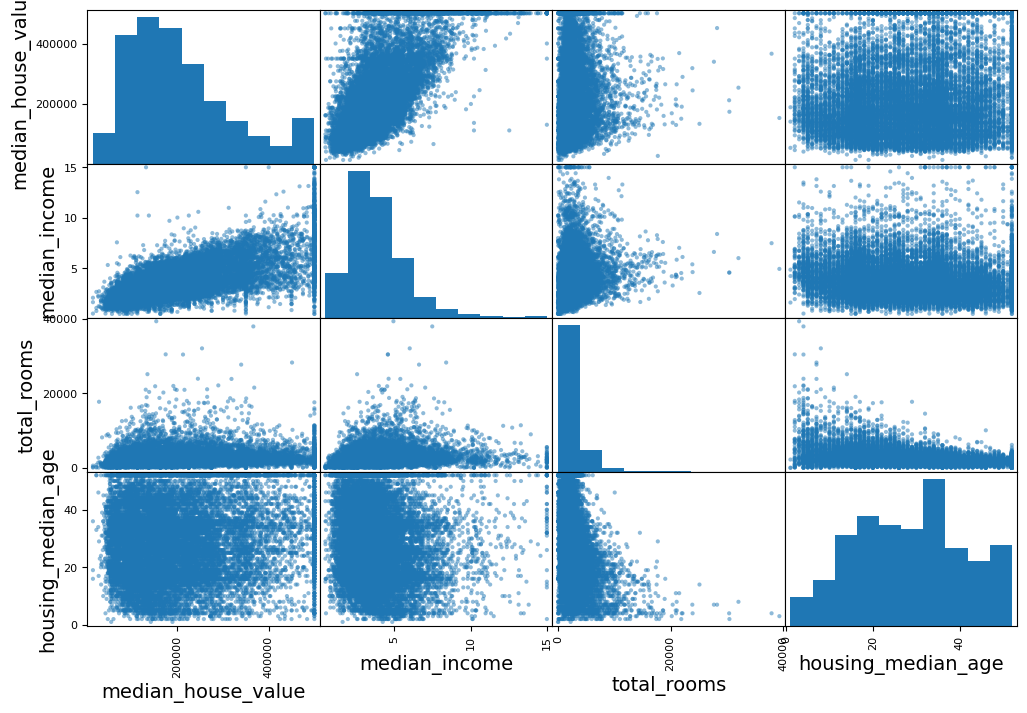

In [135]:
import pandas as pd # imports pandas and assigns it to the variable pd
from pandas.plotting import scatter_matrix # updated import statement

attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

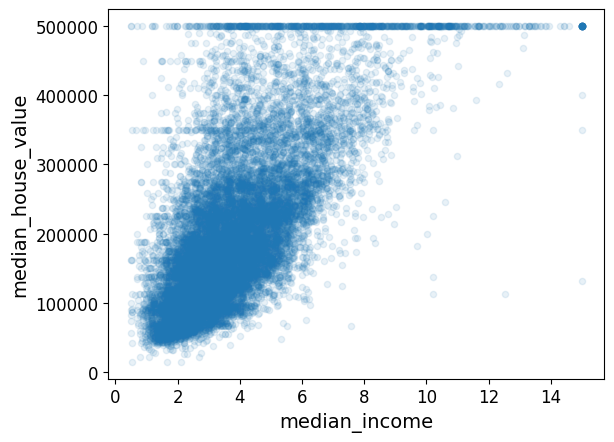

In [136]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


In [137]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [138]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


In [139]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [140]:
housing.dropna(subset=["total_bedrooms"]) # opção 1
# housing.drop("total_bedrooms", axis=1) # opção 2
# median = housing["total_bedrooms"].median() # opção 3
# housing["total_bedrooms"].fillna(median, inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [141]:
from sklearn.impute import SimpleImputer # Import SimpleImputer from sklearn.impute

imputer = SimpleImputer(strategy="median") # Create a SimpleImputer instance with strategy="median"

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [142]:
import numpy as np # Import the NumPy library and alias it as np

imputer.statistics_
np.array([ -118.51 , 34.26 , 29. , 2119.5 , 433. , 1164. , 408. , 3.5409]) # Create a NumPy array using np.array()
housing_num.median().values
np.array([ -118.51 , 34.26 , 29. , 2119.5 , 433. , 1164. , 408. , 3.5409]) # Create a NumPy array using np.array()

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [143]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [144]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [145]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [146]:
import numpy as np # Import the NumPy library and alias it as np
import pandas as pd # Import the Pandas library and alias it as pd
from sklearn.compose import ColumnTransformer # Import ColumnTransformer from sklearn.compose
from sklearn.pipeline import Pipeline # Import Pipeline from sklearn.pipeline
from sklearn.preprocessing import StandardScaler #Import StandardScaler from sklearn.preprocessing
from sklearn.impute import SimpleImputer #Import SimpleImputer from sklearn.impute
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder from sklearn.preprocessing

# Assuming num_pipeline is defined
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Create a pipeline for numerical features
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [147]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [148]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [149]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [150]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [151]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [152]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [153]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [154]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [155]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [156]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [157]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [158]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [159]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [160]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [161]:
np.allclose(old_housing_prepared, old_housing_prepared, equal_nan=True) # Check if the array is equal to itself including NaNs

True

#Train your model:


In [162]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# Use old_housing_prepared instead of housing_prepared
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [163]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [164]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

# Ensure the same pipeline is used for training and prediction
some_data_prepared = full_pipeline.transform(some_data) # Use transform to avoid refitting

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]


In [165]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.56219504567

In [166]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [167]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [168]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [169]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [71287.22859964 70767.72084507 64280.74395215 69518.88357844
 68251.21864786 68129.75802077 73227.37280032 71027.55877847
 67296.63110803 69960.57455574]
Mean: 69374.76908865155
Standard deviation: 2379.4156811319704


In [170]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean: 69204.32275494764
Standard deviation: 2372.07079105592


In [171]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [172]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22528.532428450322

In [173]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [54082.28391088 50961.02862467 48542.53245131 52877.62664578
 49096.84881566 51656.38378538 54814.82268403 51090.38640227
 49725.57426316 54589.19093748]
Mean: 51743.667852063474
Standard deviation: 2160.0120640441846


In [174]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

,0
count,10.000000
mean,69204.322755
std,2500.382157
min,65318.224029
25%,67124.346106
50%,69404.658178
75%,70697.800632
max,73003.752739


In [175]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111802.67909771342

In [176]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [177]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [178]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [179]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63827.76261554265 {'max_features': 2, 'n_estimators': 3}
55056.82212305312 {'max_features': 2, 'n_estimators': 10}
52673.5498401615 {'max_features': 2, 'n_estimators': 30}
60299.48845134689 {'max_features': 4, 'n_estimators': 3}
53106.41271952157 {'max_features': 4, 'n_estimators': 10}
50370.55528306362 {'max_features': 4, 'n_estimators': 30}
58363.22748437211 {'max_features': 6, 'n_estimators': 3}
52446.057900340325 {'max_features': 6, 'n_estimators': 10}
50177.91173851986 {'max_features': 6, 'n_estimators': 30}
58058.12321723554 {'max_features': 8, 'n_estimators': 3}
51849.42681935635 {'max_features': 8, 'n_estimators': 10}
49941.11534754462 {'max_features': 8, 'n_estimators': 30}
62820.05402812565 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53846.18083156347 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59026.17902108823 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52996.55803561763 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [180]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070999,0.001799,0.003189,0.000064,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.115539e+09,-4.091705e+09,...,-4.073983e+09,5.821121e+07,18,-1.151168e+09,-1.146269e+09,-1.145558e+09,-1.043583e+09,-1.113887e+09,-1.120093e+09,4.047592e+07
1,0.231813,0.001567,0.008813,0.000135,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.144747e+09,-2.849373e+09,...,-3.031254e+09,1.044034e+08,11,-5.913739e+08,-5.982933e+08,-5.811283e+08,-5.681101e+08,-5.883905e+08,-5.854592e+08,1.027655e+07
2,0.705455,0.003275,0.028802,0.000392,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.798874e+09,-2.589341e+09,...,-2.774503e+09,1.104047e+08,7,-4.412422e+08,-4.369587e+08,-4.290991e+08,-4.217731e+08,-4.316045e+08,-4.321355e+08,6.679468e+06
3,0.117576,0.002577,0.003288,0.000148,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.502836e+09,-3.339625e+09,...,-3.636028e+09,2.160196e+08,16,-9.856503e+08,-9.898189e+08,-9.808281e+08,-9.902819e+08,-1.013319e+09,-9.919796e+08,1.120112e+07
4,0.386917,0.009044,0.010277,0.000688,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.778760e+09,-2.614299e+09,...,-2.820291e+09,1.354553e+08,9,-5.276752e+08,-5.393865e+08,-5.306473e+08,-5.264948e+08,-5.517750e+08,-5.351957e+08,9.438121e+06
5,1.131086,0.002333,0.028927,0.000529,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.544884e+09,-2.349126e+09,...,-2.537193e+09,1.101762e+08,3,-4.040469e+08,-3.992266e+08,-3.928371e+08,-3.830632e+08,-3.974442e+08,-3.953236e+08,7.103885e+06
6,0.157246,0.000950,0.003272,0.000149,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.357326e+09,-3.362363e+09,...,-3.406266e+09,6.523742e+07,13,-8.517474e+08,-9.561176e+08,-9.038264e+08,-8.710601e+08,-9.324178e+08,-9.030339e+08,3.830027e+07
7,0.527530,0.002916,0.009490,0.000336,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.797362e+09,-2.656809e+09,...,-2.750589e+09,6.885884e+07,6,-4.993909e+08,-5.168243e+08,-5.007543e+08,-4.919507e+08,-5.240126e+08,-5.065866e+08,1.190360e+07
8,1.598829,0.033132,0.031123,0.002728,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.534328e+09,-2.396127e+09,...,-2.517823e+09,7.886174e+07,2,-3.782309e+08,-3.923535e+08,-3.808534e+08,-3.735470e+08,-3.870388e+08,-3.824047e+08,6.614228e+06
9,0.208069,0.003713,0.003228,0.000130,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.284690e+09,-3.149616e+09,...,-3.370746e+09,1.341506e+08,12,-8.710642e+08,-8.988644e+08,-9.096487e+08,-8.601465e+08,-8.511418e+08,-8.781731e+08,2.247234e+07


In [181]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aa15e2d3820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aa15e2d1420>},
                   random_state=42, scoring='neg_mean_squared_error')

In [182]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49121.49837525519 {'max_features': 7, 'n_estimators': 180}
51272.09460120037 {'max_features': 5, 'n_estimators': 15}
50535.37125677256 {'max_features': 3, 'n_estimators': 72}
50689.968708041284 {'max_features': 5, 'n_estimators': 21}
49129.57573326101 {'max_features': 7, 'n_estimators': 122}
50491.86588833997 {'max_features': 3, 'n_estimators': 75}
50414.569062947536 {'max_features': 3, 'n_estimators': 88}
49462.00096652969 {'max_features': 5, 'n_estimators': 100}
50200.230149209325 {'max_features': 3, 'n_estimators': 150}
64800.37553997819 {'max_features': 5, 'n_estimators': 2}


In [183]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.05784555e-01, 9.77608475e-02, 5.05551584e-02, 3.04116971e-02,
       2.69356863e-02, 4.06259319e-02, 2.63850940e-02, 4.51422930e-01,
       1.04299655e-02, 1.53177272e-01, 1.56358159e-05, 1.59417083e-03,
       4.90105654e-03])

In [184]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4514229299024067, 'median_income'),
 (0.1531772715909896, 'pop_per_hhold'),
 (0.10578455467355671, 'longitude'),
 (0.09776084745397103, 'latitude'),
 (0.05055515835391469, 'housing_median_age'),
 (0.04062593190523444, 'population'),
 (0.030411697118467456, 'total_rooms'),
 (0.026935686293612926, 'total_bedrooms'),
 (0.026385094002886144, 'households'),
 (0.01042996551503031, 'rooms_per_hhold'),
 (0.004901056539401569, 'INLAND'),
 (0.0015941708346023547, '<1H OCEAN'),
 (1.563581592618151e-05, 'bedrooms_per_room')]

In [185]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [186]:
final_rmse

47859.544319108194

In [187]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45909.04350565, 49733.6072416 ])

In [188]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45909.04350565146, 49733.60724159836)

In [189]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45909.62769295767, 49733.06797252083)

#Exercícios


Exercício 1



In [190]:
from sklearn.svm import SVR # import the SVR class from the sklearn.svm module
from sklearn.model_selection import GridSearchCV # import the GridSearchCV object

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

In [ ]:
grid_search.best_params_

Exercício 2


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

In [ ]:
rnd_search.best_params_

In [ ]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [ ]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

Exercício 3


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Carregando um conjunto de dados de exemplo (substitua pelo seu conjunto de dados)
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Obtendo as feature importances
feature_importances = model.feature_importances_

# Agora você pode usar feature_importances conforme necessário
k = 4
top_k_feature_indices = indices_of_top_k(feature_importances, k)
print(top_k_feature_indices)

# Define attributes (assuming it should contain the feature names)
attributes = housing.feature_names

# Accessing the elements using the indices
np.array(attributes)[top_k_feature_indices]

In [ ]:
np.array(attributes)[top_k_feature_indices]

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)


In [ ]:
# Extract the features from the housing dataset as a Pandas DataFrame (if housing is a DataFrame already, this step is unnecessary)
housing_features = pd.DataFrame(housing.data, columns=housing.feature_names)

# Check if 'longitude' is in the columns
if 'longitude' not in housing_features.columns:
    # If 'longitude' is missing, add it to the DataFrame with default values
    housing_features['longitude'] = 0  # Or any other appropriate default value

if 'latitude' not in housing_features.columns:
    # If 'latitude' is missing, add it to the DataFrame with default values
    housing_features['latitude'] = 0  # Or any other appropriate default value

if 'housing_median_age' not in housing_features.columns:
    # If 'latitude' is missing, add it to the DataFrame with default values
    housing_features['housing_median_age'] = 0  # Or any other appropriate default value
if 'total_rooms' not in housing_features.columns:
    # If 'latitude' is missing, add it to the DataFrame with default values
    housing_features['total_rooms'] = 0  # Or any other appropriate default value

if 'total_bedrooms' not in housing_features.columns:
    # If 'latitude' is missing, add it to the DataFrame with default values
    housing_features['total_bedrooms'] = 0  # Or any other appropriate default value

if 'population' not in housing_features.columns:
    # If 'latitude' is missing, add it to the DataFrame with default values
    housing_features['population'] = 0  # Or any other appropriate default value

if 'households' not in housing_features.columns:
    # If 'latitude' is missing, add it to the DataFrame with default values
    housing_features['households'] = 0  # Or any other appropriate default value

if 'median_income' not in housing_features.columns:
    # If 'latitude' is missing, add it to the DataFrame with default values
    housing_features['median_income'] = 0  # Or any other appropriate default value
if 'ocean_proximity' not in housing_features.columns:
    # If 'latitude' is missing, add it to the DataFrame with default values
    housing_features['ocean_proximity'] = 0  # Or any other appropriate default value

# Now fit and transform on the features
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing_features)

In [ ]:
!pip install pandas
import pandas as pd
# Assuming 'full_pipeline' is defined elsewhere and handles numerical feature extraction

preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

# Access the data attribute of the housing dataset and convert to a Pandas DataFrame
# Ensure all expected columns are present
housing_data = pd.DataFrame(housing.data, columns=housing.feature_names)

# Check if 'latitude' is in the DataFrame. If not, add it.
if 'latitude' not in housing_data.columns:
    # Add a dummy column for 'latitude' filled with 0s.
    housing_data['latitude'] = 0

# Check if 'longitude' is in the DataFrame. If not, add it.
if 'longitude' not in housing_data.columns:
    # Add a dummy column for 'longitude' filled with 0s.
    housing_data['longitude'] = 0

# Check if all columns used by TopFeatureSelector are present in housing_data
for col in attributes:
  if col not in housing_data:
    # If a column is missing, add a dummy column filled with 0s.
    housing_data[col] = 0
    print(f"Warning: Column '{col}' not found in housing data. Adding a dummy column.")

# Check if all columns used by TopFeatureSelector are present in housing_data
for col in attributes:
  if col not in housing_data.columns: # Use housing_data.columns to check for column names
    # If a column is missing, add a dummy column filled with 0s.
    housing_data[col] = 0
    print(f"Warning: Column '{col}' not found in housing data. Adding a dummy column.")


# Use fit_transform on the numerical data
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing_data)

In [ ]:
housing_prepared_top_k_features[0:3]

In [ ]:
housing_prepared[0:3, top_k_feature_indices]

Exercício 4

In [ ]:
# Remove 'max_features' and 'n_estimators' from best_params_ before passing to SVR

# Make a copy of best_params_ to avoid modifying the original dictionary
params = rnd_search.best_params_.copy()

# Remove 'max_features' if it exists
if 'max_features' in params:
    del params['max_features']

# Remove 'n_estimators' if it exists
if 'n_estimators' in params:
    del params['n_estimators']

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**params)) # Pass the modified params dictionary
])

In [ ]:
# Add this import statement at the beginning of your code
from sklearn.base import BaseEstimator, TransformerMixin

# Create a custom transformer to extract the 'data' attribute from the Bunch object
class BunchToDataFrameTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # Nothing else to do

    def transform(self, X):
        return X.data  # Extract the 'data' attribute

# Modify the prepare_select_and_predict_pipeline to include the new transformer
prepare_select_and_predict_pipeline = Pipeline([
    ('bunch_to_df', BunchToDataFrameTransformer()), # Add this step to the pipeline
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**params))
])

In [ ]:
# Add this import statement at the beginning of your code
import pandas as pd

# No changes are needed for the custom transformer since it will be removed from the pipeline
# class BunchToDataFrameTransformer(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self  # Nothing else to do
#
#     def transform(self, X):
#         return X.data  # Extract the 'data' attribute

# Modify the prepare_select_and_predict_pipeline to include the new transformer
prepare_select_and_predict_pipeline = Pipeline([
    #('bunch_to_df', BunchToDataFrameTransformer()), # Remove this step from the pipeline
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**params))
])

some_data = housing.data[:4] # Use the original housing.data which has 10 features
some_labels = housing_labels.iloc[:4]

# Check the shape of some_data to see if it has the expected number of features
print("Shape of some_data:", some_data.shape)

#Select the data after the preparation step
prepared_some_data = full_pipeline.transform(some_data)

# Check the shape of prepared_some_data to see if it has the expected number of features
print("Shape of prepared_some_data:", prepared_some_data.shape)

#Use prepared_some_data as an input for prediction
print("Predictions:\t", prepare_select_and_predict_pipeline.predict(prepared_some_data))
print("Labels:\t\t", list(some_labels))

Exercicio 5

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
# Ensure that housing_labels matches the number of samples in housing.data
grid_search_prep.fit(housing.data, housing_labels[:len(housing.data)]) # Slice housing_labels to match the length of housing.data

In [ ]:
grid_search_prep.best_params_